In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
from datetime import date

In [2]:
start = "2015-01-01"

end = date.today().strftime ("%Y-%m-%d")

df = data.DataReader("AAPL", 'yahoo', start, end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-12-31,28.282499,27.552500,28.205000,27.594999,165613600.0,24.983654
2015-01-02,27.860001,26.837500,27.847500,27.332500,212818400.0,24.745998
2015-01-05,27.162500,26.352501,27.072500,26.562500,257142000.0,24.048864
2015-01-06,26.857500,26.157499,26.635000,26.565001,263188400.0,24.051125
2015-01-07,27.049999,26.674999,26.799999,26.937500,160423600.0,24.388378


In [3]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-12-31,179.229996,177.259995,178.089996,177.570007,64025500.0,177.570007
2022-01-03,182.880005,177.710007,177.830002,182.009995,104487900.0,182.009995
2022-01-04,182.940002,179.119995,182.630005,179.699997,99310400.0,179.699997
2022-01-05,180.169998,174.639999,179.610001,174.919998,94218700.0,174.919998
2022-01-06,175.300003,172.119995,172.699997,172.880005,47161750.0,172.880005


In [4]:
df = df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2014-12-31,28.282499,27.552500,28.205000,27.594999,165613600.0,24.983654
1,2015-01-02,27.860001,26.837500,27.847500,27.332500,212818400.0,24.745998
2,2015-01-05,27.162500,26.352501,27.072500,26.562500,257142000.0,24.048864
3,2015-01-06,26.857500,26.157499,26.635000,26.565001,263188400.0,24.051125
4,2015-01-07,27.049999,26.674999,26.799999,26.937500,160423600.0,24.388378


In [5]:
df = df.drop(['Date','Adj Close'],axis=1)
df.head()

,High,Low,Open,Close,Volume
0,28.282499,27.552500,28.205000,27.594999,165613600.0
1,27.860001,26.837500,27.847500,27.332500,212818400.0
2,27.162500,26.352501,27.072500,26.562500,257142000.0
3,26.857500,26.157499,26.635000,26.565001,263188400.0
4,27.049999,26.674999,26.799999,26.937500,160423600.0


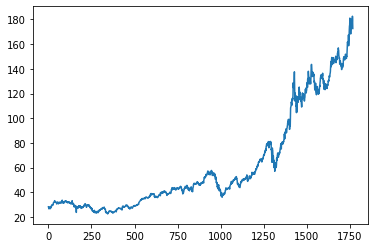

In [6]:
plt.plot(df.Open)

In [7]:
df

,High,Low,Open,Close,Volume
0,28.282499,27.552500,28.205000,27.594999,165613600.0
1,27.860001,26.837500,27.847500,27.332500,212818400.0
2,27.162500,26.352501,27.072500,26.562500,257142000.0
3,26.857500,26.157499,26.635000,26.565001,263188400.0
4,27.049999,26.674999,26.799999,26.937500,160423600.0
...,...,...,...,...,...
1763,179.229996,177.259995,178.089996,177.570007,64025500.0
1764,182.880005,177.710007,177.830002,182.009995,104487900.0
1765,182.940002,179.119995,182.630005,179.699997,99310400.0
1766,180.169998,174.639999,179.610001,174.919998,94218700.0


In [8]:
ma100 = df.Open.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
1763    154.3585
1764    154.6763
1765    155.0407
1766    155.3471
1767    155.5887
Name: Open, Length: 1768, dtype: float64

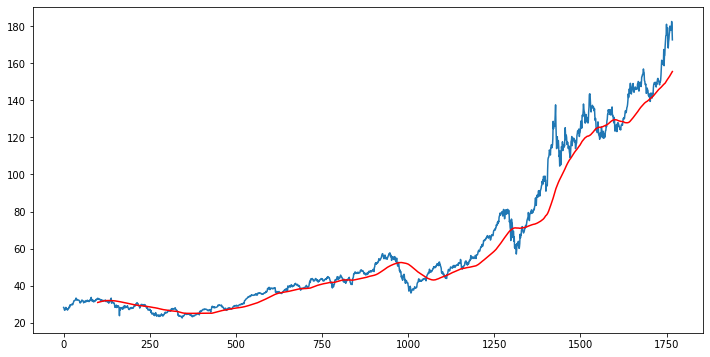

In [9]:
plt.figure(figsize=(12,6))
plt.plot(df.Open)
plt.plot(ma100,'r')

In [10]:
ma200 = df.Open.rolling(200).mean()
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
1763    143.707551
1764    143.997201
1765    144.308701
1766    144.590101
1767    144.839501
Name: Open, Length: 1768, dtype: float64

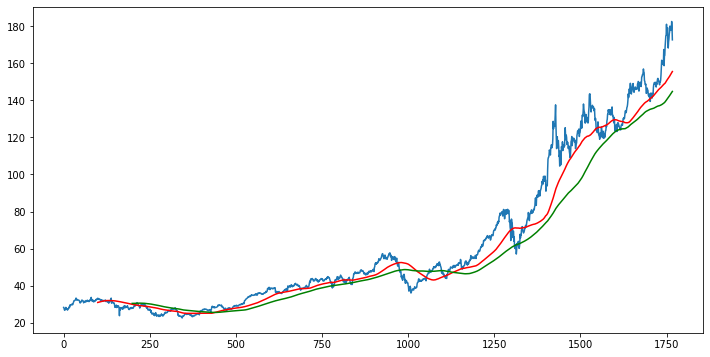

In [11]:
plt.figure(figsize=(12,6))
plt.plot(df.Open)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [12]:
df.shape

(1768, 5)

In [13]:
data_training = pd.DataFrame(df['Open'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Open'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1237, 1)
(531, 1)


In [14]:
data_training.head()

,Open
0,28.205000
1,27.847500
2,27.072500
3,26.635000
4,26.799999


In [15]:
data_testing.head()

,Open
1237,66.650002
1238,66.817497
1239,64.577499
1240,65.267502
1241,65.947502


In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [17]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.12827431],
       [0.12023609],
       [0.10281058],
       ...,
       [0.97082629],
       [0.99460376],
       [0.98695892]])

In [18]:
data_training_array.shape

(1237, 1)

In [19]:
x_train = []
y_train = []

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
    
x_train,y_train = np.array(x_train),np.array(y_train)

In [20]:
x_train.shape

(1137, 100, 1)

In [21]:
from keras.models import load_model

model = load_model('keras_model.h5')

In [22]:
data_testing.head()

,Open
1237,66.650002
1238,66.817497
1239,64.577499
1240,65.267502
1241,65.947502


In [23]:
data_training.tail(100)

,Open
1137,50.462502
1138,50.827499
1139,50.612499
1140,51.022499
1141,51.147499
...,...
1232,65.922501
1233,65.647499
1234,65.677498
1235,66.735001


In [24]:
past_100_days = data_training.tail(100)

In [25]:
final_df = past_100_days.append(data_testing,ignore_index=True)

In [26]:
final_df.head()

,Open
0,50.462502
1,50.827499
2,50.612499
3,51.022499
4,51.147499


In [27]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.01203491],
       [0.01476331],
       [0.01315616],
       [0.01622095],
       [0.01715534],
       [0.01614621],
       [0.01605277],
       [0.01939786],
       [0.01539868],
       [0.02438751],
       [0.02291117],
       [0.02519107],
       [0.02255609],
       [0.02438751],
       [0.02494812],
       [0.03926294],
       [0.03455362],
       [0.01891199],
       [0.00482144],
       [0.00168189],
       [0.        ],
       [0.00895142],
       [0.01100708],
       [0.00786753],
       [0.01048383],
       [0.014483  ],
       [0.01504364],
       [0.01657602],
       [0.02842405],
       [0.02890995],
       [0.03285306],
       [0.03322681],
       [0.0262002 ],
       [0.01952869],
       [0.02326624],
       [0.01623966],
       [0.02446225],
       [0.02756443],
       [0.02059388],
       [0.02425669],
       [0.03100296],
       [0.03483396],
       [0.03631028],
       [0.03447889],
       [0.04234644],
       [0.05492328],
       [0.04595316],
       [0.041

In [28]:
input_data.shape

(631, 1)

In [29]:
x_test = []
y_test = []

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [30]:
x_test,y_test = np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(531, 100, 1)
(531,)


In [31]:
#Making Predictions
y_predicted = model.predict(x_test)

In [32]:
y_predicted.shape

(531, 1)

In [33]:
y_test

array([0.13303807, 0.13429011, 0.11754591, 0.12270375, 0.12778682,
       0.1346826 , 0.13939189, 0.13677562, 0.13716804, 0.13524321,
       0.14212028, 0.15247331, 0.15727608, 0.15770586, 0.15714525,
       0.16224702, 0.15907008, 0.16684419, 0.16708714, 0.1788604 ,
       0.17575823, 0.17663655, 0.18842852, 0.19012911, 0.18385005,
       0.19515612, 0.19014781, 0.20898504, 0.21526415, 0.21720769,
       0.22666369, 0.21760012, 0.22085177, 0.22586007, 0.22757937,
       0.23017693, 0.22894359, 0.23329781, 0.214255  , 0.2190017 ,
       0.24114669, 0.23383977, 0.23456857, 0.20349084, 0.22406606,
       0.23940869, 0.23763338, 0.23725961, 0.22195434, 0.23955822,
       0.23557772, 0.24066079, 0.24168859, 0.22415948, 0.23283062,
       0.23774551, 0.2302517 , 0.1903347 , 0.19723049, 0.17028273,
       0.1601353 , 0.11558372, 0.16234044, 0.20231356, 0.18880229,
       0.187083  , 0.16181718, 0.12771205, 0.15273497, 0.15320216,
       0.11311692, 0.12984248, 0.08697276, 0.09736314, 0.08289

In [34]:
scaler.scale_

array([0.0074751])

In [35]:
scale_factor = 1/0.00851607
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor


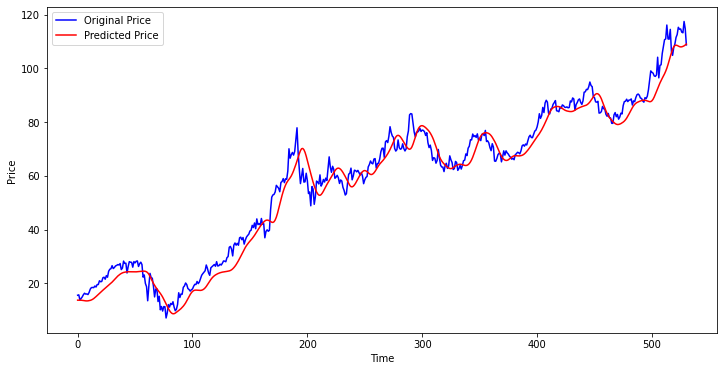

In [36]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label ="Original Price")
plt.plot(y_predicted,"r",label = "Predicted Price")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()